In [1]:
# Qiskit setup
from qiskit_ibm_runtime import QiskitRuntimeService


# This uses a local simulator
from qiskit_aer import AerSimulator

#Load the Runtime primitive and session
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler

# #Use the least busy backend
# service = QiskitRuntimeService(channel='ibm_quantum')
# backend = service.least_busy()
# print(backend.name)
# This generates a simulator that mimics the real quantum system
backend_sim = AerSimulator()

#Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSampler
service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.least_busy()
print(backend.name)
sampler = Sampler(mode=backend)
sampler.options.default_shots = 100


from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
backend_sim = AerSimulator()
simulator = AerSimulator()

#Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSampler
sampler = BackendSampler(backend = backend_sim)
import numpy as np
from qiskit.visualization import plot_bloch_vector, plot_histogram
import matplotlib.pyplot as plt

from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit, Parameter
from qiskit import QuantumCircuit, transpile
from qiskit.result import marginal_counts
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator



ibm_kyiv


/tmp/ipykernel_22878/1001870318.py:34: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler = BackendSampler(backend = backend_sim)


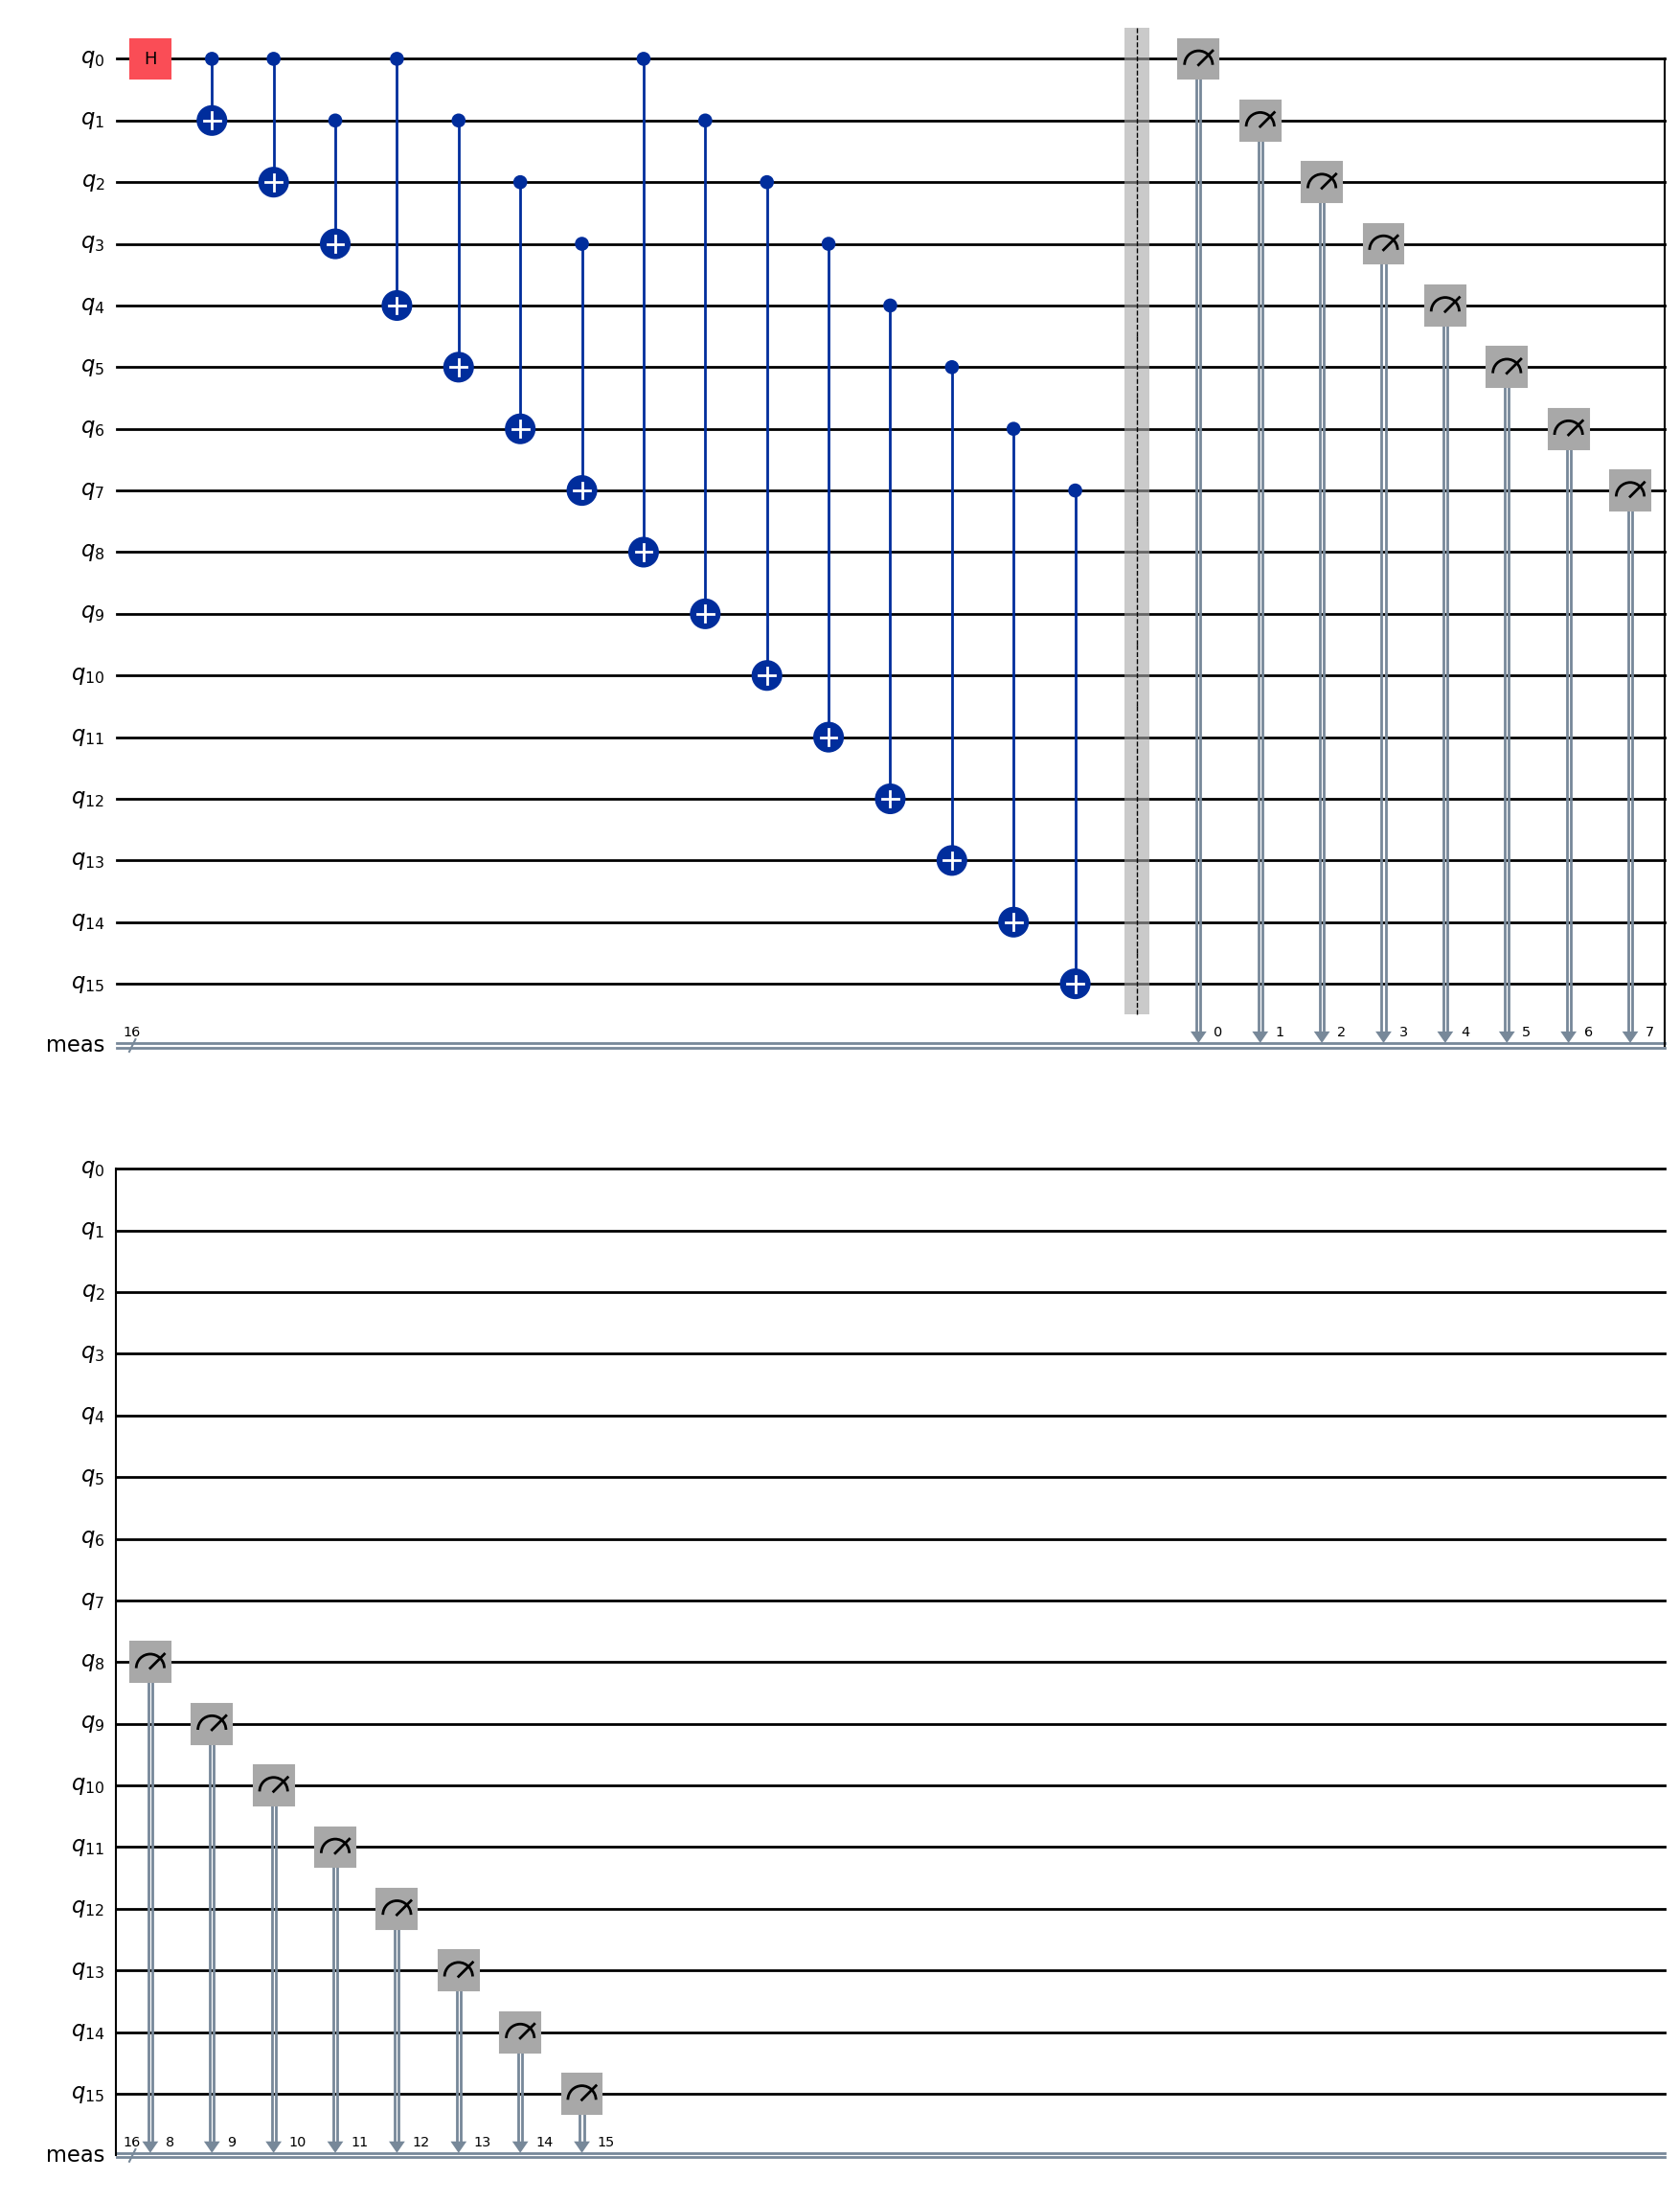

In [2]:
def circuit_ghz(qc_bell,n):
    qc_bell.h(0)
    for k in range(1,n):
        print(k)
        qc_bell.cx(0,k)
    return qc_bell


def circuit_ghz_boost(qc_bell,n):
    qc_bell.h(0)
    qc_bell.cx(0,1)
    compt=1
    a=1
    while compt<n and a!=0:
        a=0
        for k in range(compt+1):
            if compt+k+1<n:
                qc_bell.cx(k,compt+1+k)
                a+=1
        compt+=a
    return qc_bell

n=2**4
qc_bell = QuantumCircuit(n)
qc_bell=circuit_ghz_boost(qc_bell,n)
qc_bell.measure_all()
qc_bell.draw('mpl')


In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.least_busy()
print(backend.name)
sampler = Sampler(mode=backend)
sampler.options.default_shots = 100

ibm_kyiv


In [4]:
# transpiling the circuits
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
qc_transpiled = pm.run(qc_bell)

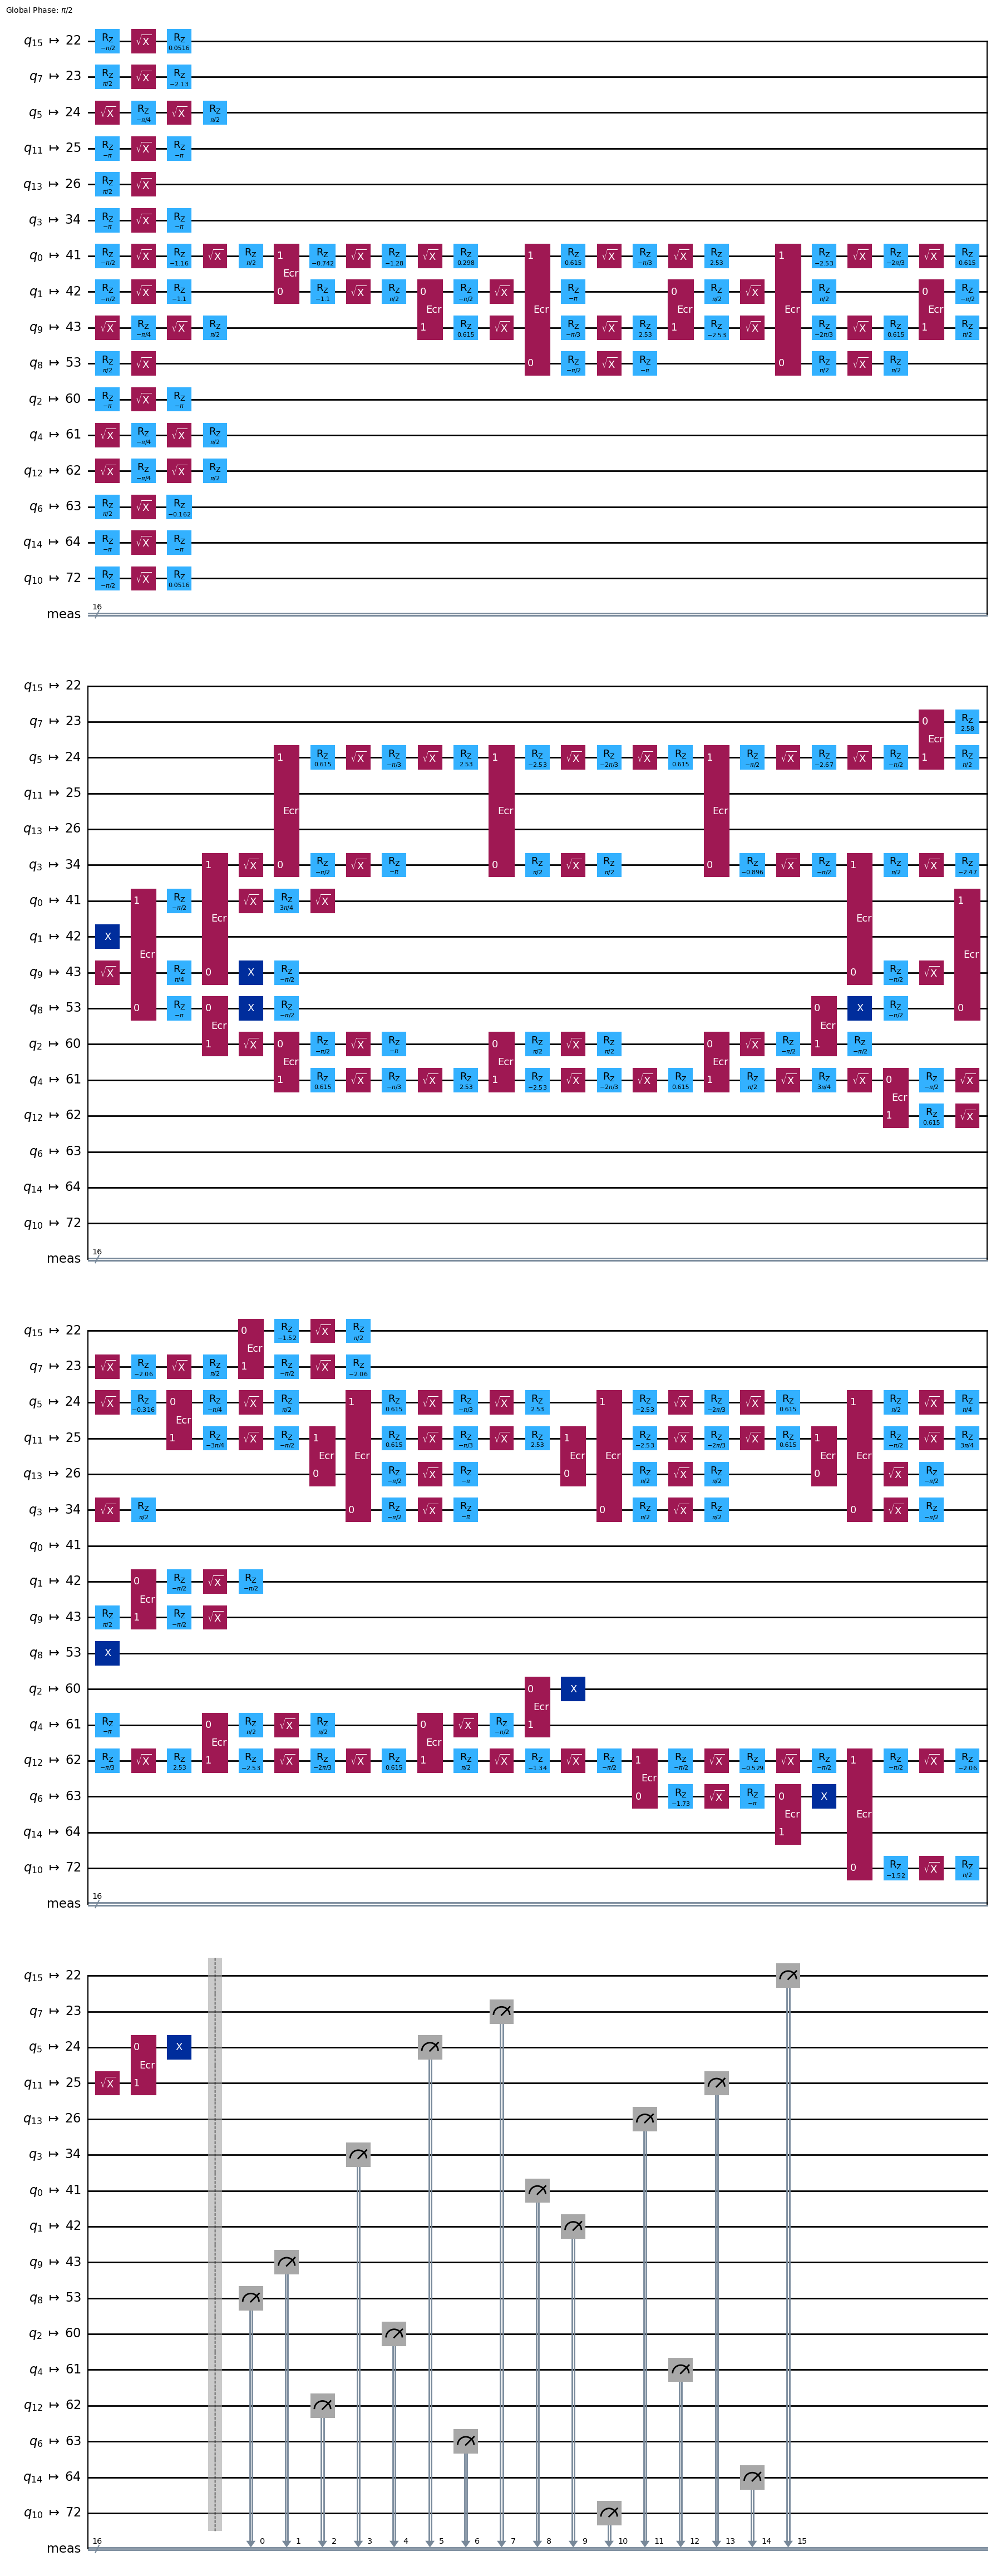

In [5]:
qc_transpiled.draw('mpl', idle_wires=False)

In [6]:
shots = 10_000
job = sampler.run([qc_transpiled], shots=shots)

In [7]:
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cz5hgyk39f40008sk53g
>>> Job Status: QUEUED


In [8]:
job.result()[0].data

DataBin(meas=BitArray(<shape=(), num_shots=10000, num_bits=16>))

{0: 879, 1: 1777, 2: 2032, 3: 1691, 4: 1350, 5: 875, 6: 604, 7: 517, 8: 275}


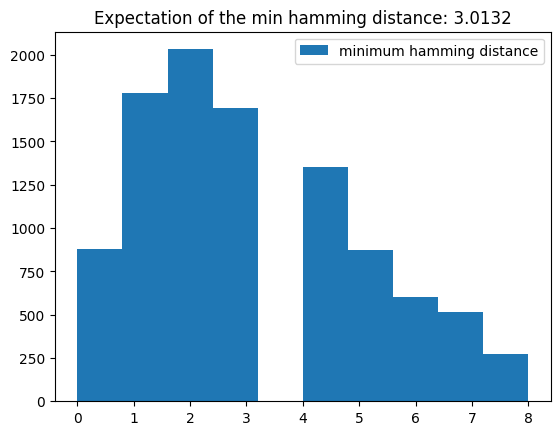

In [9]:
counts = job.result()[0].data.meas.get_counts()
#plot_histogram(counts)
def dist(x):
    nb1=0
    nb0=0
    for k in x:
        if k=='1':
            nb1+=1
        else:
            nb0+=1
    return min(nb0,nb1)
L=[]
for k in counts:
    a=counts[k]
    for i in range(a):
        L.append(dist(k))
plt.hist(L)
esp_erreur=sum(L)/len(L)
plt.legend(['minimum hamming distance'])
plt.title("Expectation of the min hamming distance: "+str(esp_erreur))
dico={k : 0 for k in range(9)}
for k in L:
    dico[k]=dico[k]+1
print(dico)